In [29]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import numpy as np
import seaborn as sns

#Freiburg Bikes Sets
freiburg_dataset = "./Freiburg_bikes.csv"
df_freiburg_all = pd.read_csv(freiburg_dataset)

#df_freiburg.shape #(245472, 5)
#df_freiburg_all.info()

# I want to drop the column Datetime for now
df_freiburg = df_freiburg_all.drop(columns='Datetime')

# I also want to sort my DataFrame, depending on the "Datum" column and also by the "Stunde" column
df_freiburg = df_freiburg.sort_values(by=['Datum','Stunde'], ascending=[True, True])

# Reset the index of the DataFrame to a continuous sequence starting from 0 to the last value using the reset_index() method with the parameter drop=True.
df_freiburg.reset_index(drop=True, inplace=True)

df_freiburg.info()

# Convert 'Datum' column to datetime
df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Rename the columns
df_freiburg = df_freiburg.rename(columns={
    'Datum': 'Date',
    'Stunde': 'Hour',
    'Fahrrad-Zählstelle': 'Location',
    'Anzahl Fahrräder': 'TotalBikeCount'
})

# Display the DataFrame to verify the changes
print(df_freiburg.head())

# Get list of unique locations names
unique_locations = df_freiburg['Location'].unique()
print(unique_locations)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Datum               245472 non-null  object
 1   Stunde              245472 non-null  int64 
 2   Fahrrad-Zählstelle  245472 non-null  int64 
 3   Anzahl Fahrräder    245472 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
        Date  Hour  Location  TotalBikeCount
0 2015-01-01     0         1              16
1 2015-01-01     0         2               8
2 2015-01-01     0         3               6
3 2015-01-01     0         4              18
4 2015-01-01     1         1              41
[1 2 3 4]


        Date  Location  TotalBikeCount
0 2015-01-01         1             726
1 2015-01-01         2             201
2 2015-01-01         3             448
3 2015-01-01         4             925
4 2015-01-02         1            1169


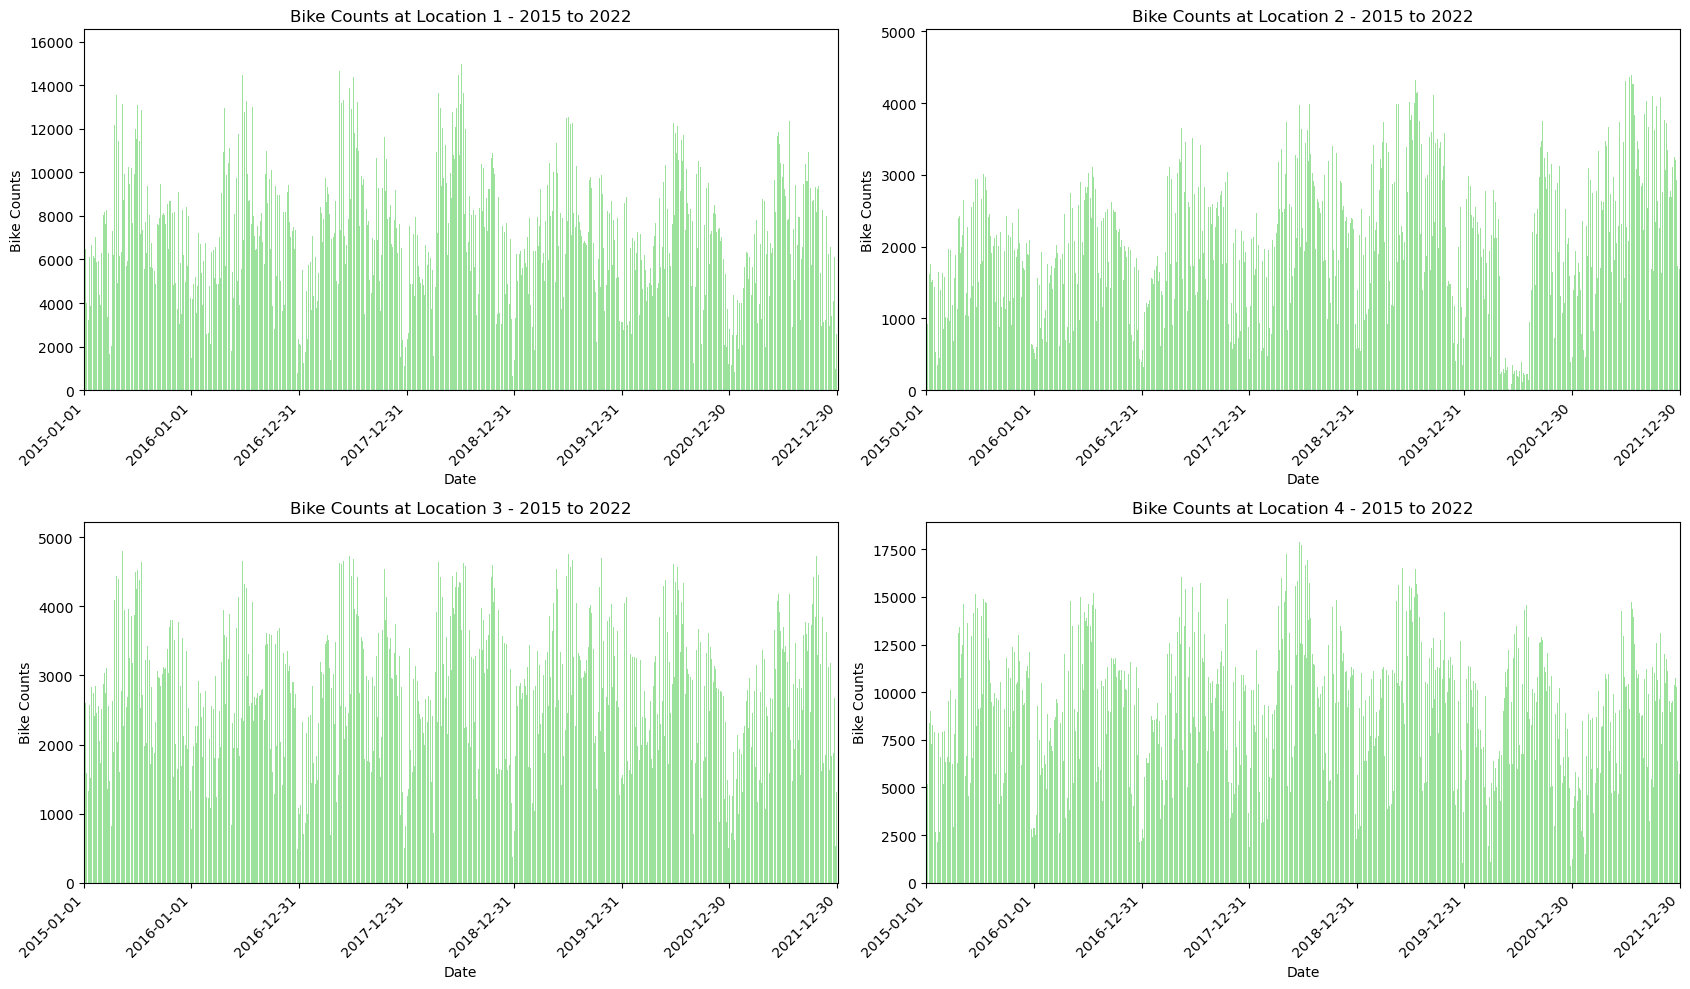

In [30]:
# Convert 'Date' column to datetime
df_freiburg['Date'] = pd.to_datetime(df_freiburg['Date'])

# Group by 'Date' and 'Location' and sum the 'TotalBikeCount' values
df_daily_counts = df_freiburg.groupby(['Date', 'Location'])['TotalBikeCount'].sum().reset_index()

print(df_daily_counts.head())

# Create a figure and six subplots
fig, axs = plt.subplots(2, 2, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_daily_counts[df_daily_counts['Location'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.barplot(data=df_location, x=df_location['Date'].dt.date, y='TotalBikeCount', color='lightgreen')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at Location {location} - 2015 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()


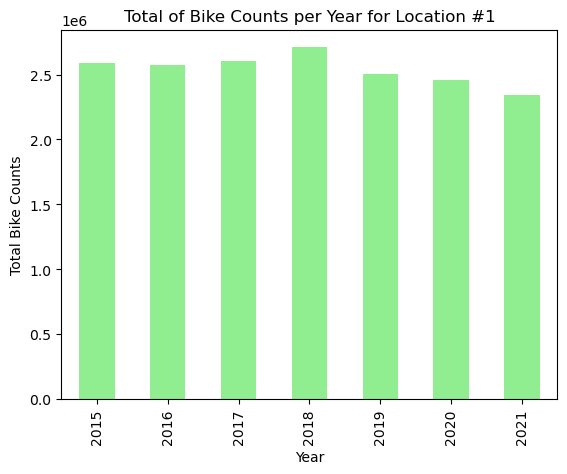

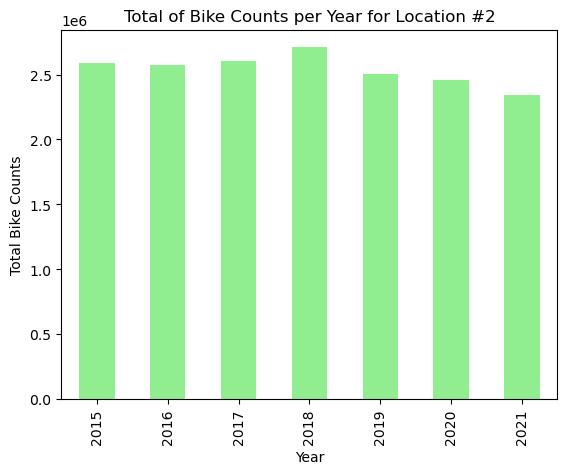

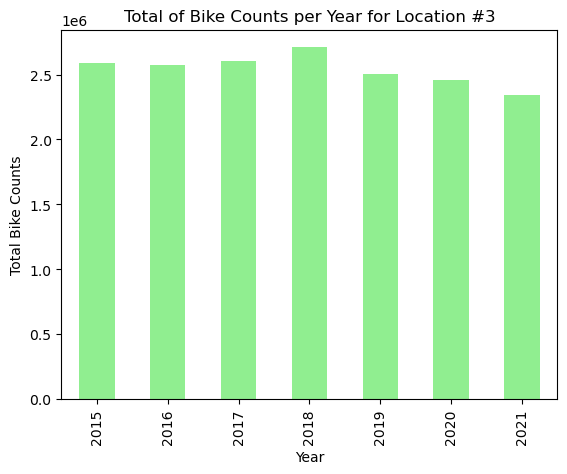

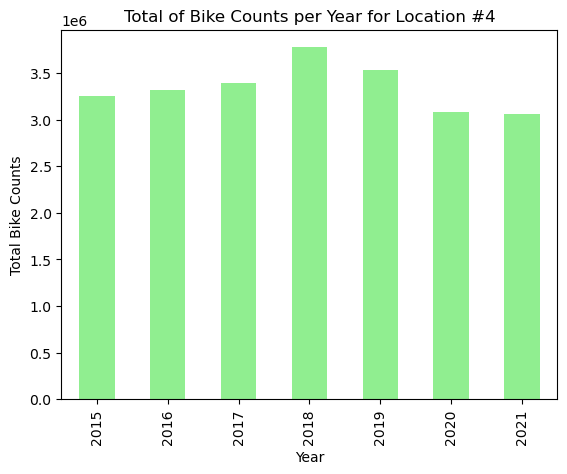

In [41]:
# Convert 'Date' column to datetime
df_daily_counts['Date'] = pd.to_datetime(df_daily_counts['Date'])

# Extract year from 'Date' column
df_daily_counts['Year'] = df_daily_counts['Date'].dt.year

# Filter data for Location 1
location_1_data = df_daily_counts[df_daily_counts['Location'] == 1]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 1
yearly_counts_location_1 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_1.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #1')
plt.show()

# Filter data for Location 2
location_2_data = df_daily_counts[df_daily_counts['Location'] == 2]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 2
yearly_counts_location_2 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_2.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #2')
plt.show()

# Filter data for Location 3
location_3_data = df_daily_counts[df_daily_counts['Location'] == 3]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 2
yearly_counts_location_3 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_3.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #3')
plt.show()


# Filter data for Location 4
location_4_data = df_daily_counts[df_daily_counts['Location'] == 4]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 4
yearly_counts_location_4 = location_4_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_4.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #4')
plt.show()
